<a href="https://colab.research.google.com/github/pahvani/algo-strategies-mini-project-pahvani/blob/main/lab%20assignment%20-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
NumPy: 2.0.2
Matplotlib: 3.10.0

Starting all tasks...

=== Problem 1: Scheduling TV Commercials (Greedy) ===
Selected ad slots (slot, id, profit):
  (1, 'F', 80)
  (2, 'A', 100)
  (3, 'G', 45)
Total profit: 225



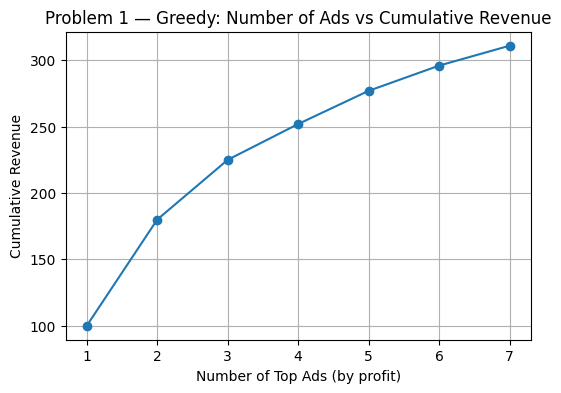

Problem 1 Notes:
- Time: O(n log n) for sort; naive scheduling worst-case O(n * D) where D = max deadline
- Space: O(D) for slots array.
- Real-world: Ads have variable durations, slot lengths vary, business/legal constraints apply.

=== Problem 2: 0/1 Knapsack (DP) ===
Items (index:value:weight):
  0: value=60, weight=10
  1: value=100, weight=20
  2: value=120, weight=30
Capacity: 50
Max profit achievable: 220
Picked item indices: [1, 2]
  Picked -> 1 100 20
  Picked -> 2 120 30



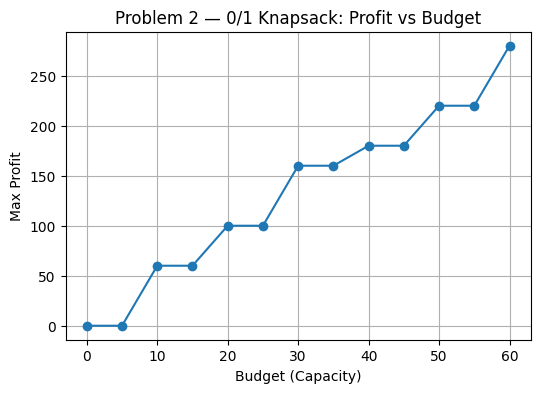

Problem 2 Notes:
- Time: O(n * capacity). Space: O(n * capacity).
- You can reduce space to O(capacity) with a 1D dp array (but recovering choices needs extra work).

=== Problem 3: Sudoku Solver (Backtracking) ===
Solved Sudoku in 0.073246 seconds. Solution:
  [5, 3, 4, 6, 7, 8, 9, 1, 2]
  [6, 7, 2, 1, 9, 5, 3, 4, 8]
  [1, 9, 8, 3, 4, 2, 5, 6, 7]
  [8, 5, 9, 7, 6, 1, 4, 2, 3]
  [4, 2, 6, 8, 5, 3, 7, 9, 1]
  [7, 1, 3, 9, 2, 4, 8, 5, 6]
  [9, 6, 1, 5, 3, 7, 2, 8, 4]
  [2, 8, 7, 4, 1, 9, 6, 3, 5]
  [3, 4, 5, 2, 8, 6, 1, 7, 9]



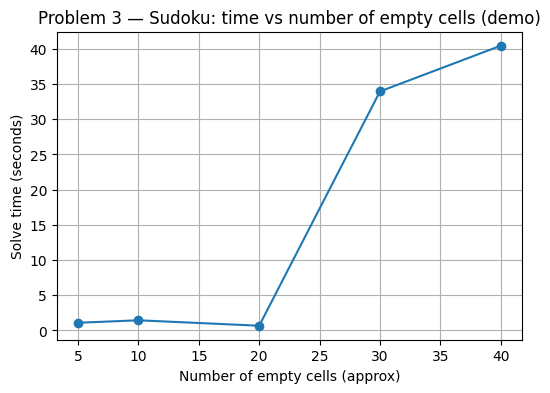

Problem 3 Notes:
- Backtracking is exponential in worst case; heuristics (MRV, forward checking) and Algorithm X (Dancing Links) greatly speed up solving hard puzzles.

=== Problem 4: Password Cracking (Naive Brute-Force) ===
Found password: 'b2' in 17 trials, time 0.000019 seconds



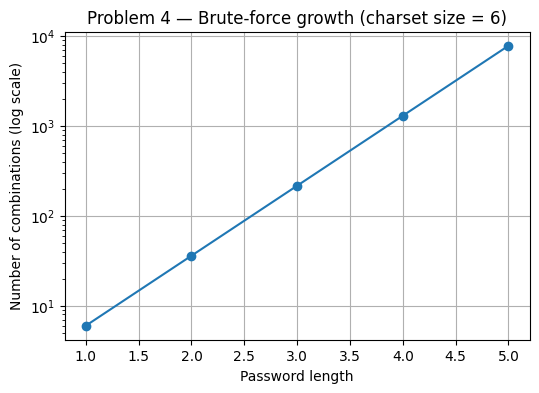

Problem 4 Notes:
- Complexity: O(|charset|^L) (exponential).
- Real-world systems use rate-limiting, lockouts, and legal protections; never attack systems you do not own or have permission to test.



In [2]:

import sys
import time
import itertools
from copy import deepcopy
from typing import List, Tuple, Optional
import numpy as np
import matplotlib.pyplot as plt
import math
import os

import sys
sys.setrecursionlimit(10000)

print("Python:", sys.version.splitlines()[0])
print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("\nStarting all tasks...\n")




def schedule_ads_greedy(ads: List[Ad]):
    """
    Sort ads by profit desc, schedule each ad in the latest free slot <= deadline.
    Returns selected list of (slot, id, profit), total_profit, slots array.
    """
    if not ads:
        return [], 0, []
    ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)
    max_deadline = max(ad[1] for ad in ads_sorted)
    slots = [None] * (max_deadline + 1)
    total_profit = 0
    selected = []

    for ad_id, deadline, profit in ads_sorted:
        for s in range(min(max_deadline, deadline), 0, -1):
            if slots[s] is None:
                slots[s] = (ad_id, profit)
                selected.append((s, ad_id, profit))
                total_profit += profit
                break

    selected.sort()
    return selected, total_profit, slots


ads_sample = [
    ("A", 2, 100),
    ("B", 1, 19),
    ("C", 2, 27),
    ("D", 1, 25),
    ("E", 3, 15),
    ("F", 2, 80),
    ("G", 3, 45)
]

selected, total_profit, slots = schedule_ads_greedy(ads_sample)

print("=== Problem 1: Scheduling TV Commercials (Greedy) ===")
print("Selected ad slots (slot, id, profit):")
for slot_info in selected:
    print(" ", slot_info)
print("Total profit:", total_profit)
print()


profits_sorted_desc = sorted([p for (_,_,p) in ads_sample], reverse=True)
cumulative_profits = np.cumsum(profits_sorted_desc)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(cumulative_profits)+1), cumulative_profits, marker='o')
plt.xlabel("Number of Top Ads (by profit)")
plt.ylabel("Cumulative Revenue")
plt.title("Problem 1 — Greedy: Number of Ads vs Cumulative Revenue")
plt.grid(True)
plt.show()

print("Problem 1 Notes:")
print("- Time: O(n log n) for sort; naive scheduling worst-case O(n * D) where D = max deadline")
print("- Space: O(D) for slots array.")
print("- Real-world: Ads have variable durations, slot lengths vary, business/legal constraints apply.")
print()


def knapsack_01(values: List[int], weights: List[int], capacity: int):
    """
    Bottom-up DP. Returns (max_value, chosen_indices, dp_table)
    """
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        val = values[i-1]
        wt = weights[i-1]
        for w in range(capacity + 1):
            if wt <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-wt] + val)
            else:
                dp[i][w] = dp[i-1][w]

    res = dp[n][capacity]
    chosen = []
    w = capacity
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            chosen.append(i-1)
            w -= weights[i-1]
    chosen.reverse()
    return res, chosen, dp

values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50

max_profit, chosen_indices, dp_table = knapsack_01(values, weights, capacity)

print("=== Problem 2: 0/1 Knapsack (DP) ===")
print("Items (index:value:weight):")
for i in range(len(values)):
    print(f"  {i}: value={values[i]}, weight={weights[i]}")
print("Capacity:", capacity)
print("Max profit achievable:", max_profit)
print("Picked item indices:", chosen_indices)
for idx in chosen_indices:
    print("  Picked ->", idx, values[idx], weights[idx])
print()


capacities = list(range(0, 61, 5))
profits_by_cap = [knapsack_01(values, weights, c)[0] for c in capacities]

plt.figure(figsize=(6,4))
plt.plot(capacities, profits_by_cap, marker='o')
plt.xlabel("Budget (Capacity)")
plt.ylabel("Max Profit")
plt.title("Problem 2 — 0/1 Knapsack: Profit vs Budget")
plt.grid(True)
plt.show()

print("Problem 2 Notes:")
print("- Time: O(n * capacity). Space: O(n * capacity).")
print("- You can reduce space to O(capacity) with a 1D dp array (but recovering choices needs extra work).")
print()



sample_grid = [
    [5,3,0, 0,7,0, 0,0,0],
    [6,0,0, 1,9,5, 0,0,0],
    [0,9,8, 0,0,0, 0,6,0],

    [8,0,0, 0,6,0, 0,0,3],
    [4,0,0, 8,0,3, 0,0,1],
    [7,0,0, 0,2,0, 0,0,6],

    [0,6,0, 0,0,0, 2,8,0],
    [0,0,0, 4,1,9, 0,0,5],
    [0,0,0, 0,8,0, 0,7,9]
]

def find_empty(grid):
    for r in range(9):
        for c in range(9):
            if grid[r][c] == 0:
                return r, c
    return None

def is_safe(grid, r, c, val):

    if any(grid[r][j] == val for j in range(9)):
        return False

    if any(grid[i][c] == val for i in range(9)):
        return False

    br = (r // 3) * 3
    bc = (c // 3) * 3
    for i in range(br, br + 3):
        for j in range(bc, bc + 3):
            if grid[i][j] == val:
                return False
    return True

def solve_sudoku(grid) -> Optional[list]:
    pos = find_empty(grid)
    if not pos:
        return grid
    r, c = pos
    for val in range(1, 10):
        if is_safe(grid, r, c, val):
            grid[r][c] = val
            if solve_sudoku(grid):
                return grid
            grid[r][c] = 0
    return None

print("=== Problem 3: Sudoku Solver (Backtracking) ===")
grid_copy = deepcopy(sample_grid)
t0 = time.time()
solution = solve_sudoku(grid_copy)
elapsed = time.time() - t0
if solution:
    print(f"Solved Sudoku in {elapsed:.6f} seconds. Solution:")
    for row in solution:
        print(" ", row)
else:
    print("No solution found.")
print()


def time_for_empty_counts(template_grid, counts):
    times = []
    for c in counts:
        g = deepcopy(template_grid)
        removed = 0

        for i in range(9):
            for j in range(9):
                if removed < c:
                    g[i][j] = 0
                    removed += 1
        t0 = time.time()
        _ = solve_sudoku(deepcopy(g))
        times.append(time.time() - t0)
    return times

counts = [5, 10, 20, 30, 40]
times = time_for_empty_counts(sample_grid, counts)

plt.figure(figsize=(6,4))
plt.plot(counts, times, marker='o')
plt.xlabel("Number of empty cells (approx)")
plt.ylabel("Solve time (seconds)")
plt.title("Problem 3 — Sudoku: time vs number of empty cells (demo)")
plt.grid(True)
plt.show()

print("Problem 3 Notes:")
print("- Backtracking is exponential in worst case; heuristics (MRV, forward checking) and Algorithm X (Dancing Links) greatly speed up solving hard puzzles.")
print()


def brute_force_crack(target: str, charset: str, max_len: int, show_progress=False):
    """
    Try all combinations from charset up to max_len.
    Returns (found_password or None, trials, elapsed_seconds)
    """
    start = time.time()
    trials = 0

    max_trials_cutoff = 10_000_000
    for L in range(1, max_len + 1):

        for cand in itertools.product(charset, repeat=L):
            trials += 1
            if trials % 500000 == 0 and show_progress:
                print(f"  Tried {trials} candidates so far...")
            guess = ''.join(cand)
            if guess == target:
                elapsed = time.time() - start
                return guess, trials, elapsed
            if trials >= max_trials_cutoff:
                elapsed = time.time() - start
                return None, trials, elapsed
    elapsed = time.time() - start
    return None, trials, elapsed

print("=== Problem 4: Password Cracking (Naive Brute-Force) ===")

charset = "abc123"
demo_password = "b2"
max_len = 3

found, trials, elapsed = brute_force_crack(demo_password, charset, max_len, show_progress=False)
if found:
    print(f"Found password: '{found}' in {trials} trials, time {elapsed:.6f} seconds")
else:
    print(f"Password not found after {trials} trials, elapsed {elapsed:.6f} seconds")
print()

charset_size = len(charset)
lengths = [1, 2, 3, 4, 5]
counts = [charset_size ** L for L in lengths]

plt.figure(figsize=(6,4))
plt.plot(lengths, counts, marker='o')
plt.yscale('log')
plt.xlabel("Password length")
plt.ylabel("Number of combinations (log scale)")
plt.title(f"Problem 4 — Brute-force growth (charset size = {charset_size})")
plt.grid(True)
plt.show()

print("Problem 4 Notes:")
print("- Complexity: O(|charset|^L) (exponential).")
print("- Real-world systems use rate-limiting, lockouts, and legal protections; never attack systems you do not own or have permission to test.")
print()

